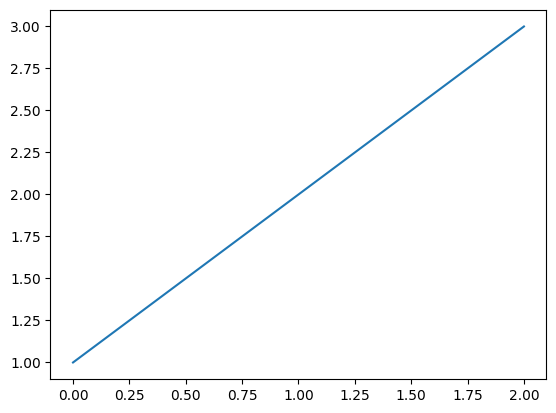

Extracting C:\Users\niwatori\OneDrive\code\vision\handmadecnn\mnist\train-images-idx3-ubyte.gz
Extracting C:\Users\niwatori\OneDrive\code\vision\handmadecnn\mnist\train-labels-idx1-ubyte.gz
Extracting C:\Users\niwatori\OneDrive\code\vision\handmadecnn\mnist\t10k-images-idx3-ubyte.gz
Extracting C:\Users\niwatori\OneDrive\code\vision\handmadecnn\mnist\t10k-labels-idx1-ubyte.gz


torch.Size([55000, 28, 28, 1])

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.show()
from NNforshow import *

import os 
import pandas as pd
import numpy as np
import random
import input_data
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

    
device = torch.device( "cpu")
device

current_file = os.path.abspath ('')
current_dir = os.path.dirname (current_file)
target_file = os.path.join (current_dir+"\\vision\\", "handmadecnn", "mnist")
mnist = input_data.read_data_sets(target_file, one_hot = False)
X = mnist.train.images.reshape(55000,28,28,1)
Y =mnist.train.labels
MAXNUM = 55000

X = torch.tensor(X).to(device)
Y = torch.tensor(Y).to(device)
X.shape

In [2]:
def plot_with_values(models, dataset_name, num_layers, sample_size, precision=1):
    """
    Plot a line chart with data point values and save the results to a CSV file.

    Parameters:
    models (list): List of model objects containing 'testhis' data.
    dataset_name (str): Name of the dataset (e.g., "Wine Dataset").
    num_layers (int): Number of layers in the model.
    sample_size (int): Size of the training dataset.
    precision (int): Number of decimal places to display for data point values.
    """
    labels = [
        'Our Proposed Method',
        'Our Method with Stabilizer',
        'Baseline Method',
        'L2 Regularization (λ=0.01)',
        'L2 Regularization (λ=0.1)'
    ]
    
    x_values = range(len(models[0].testhis))  # Assuming x-axis is the epoch index
    csv_dict = {'Epoch': x_values}
    
    for i in range(len(models)):
        y = np.array(models[i].testhis)/100
        plt.plot(x_values, y, label=labels[i])
        
        # Add data for CSV
        csv_dict[labels[i]] = y
        
        # Display data point values
        for j in range(len(y)):
            plt.text(x_values[j], y[j], f'{y[j]:.{precision}f}', ha='center', va='bottom')
    
    # Set the plot title and labels in English
    plt.title(f'Results on {dataset_name} Dataset with {num_layers} Layers and Sample Size {sample_size}')
    plt.xlabel('Training Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Save the data to a CSV file
    df = pd.DataFrame(csv_dict)
    safe_dataset_name = dataset_name.replace(' ', '_')
    csv_filename = f'{safe_dataset_name}_layers{num_layers}_samples{sample_size}.csv'
    df.to_csv(csv_filename, index=False)

    
def trainmodelset(modelset):
    for i in range(5):
        m = modelset.models[i]

        if i <3: #如果属于self.model_my, self.model_mystable, self.model_base
            right = modelset.train_step(m, X, Y)
        else: #如果属于self.model_L2light, self.model_L2heavy
            right = modelset.train_step_L2(m, X, Y)
        m.trainhis.append(right)

        right2 = modelset.test_step(m, X,Y)
        m.testhis.append(right2)

        print(i+1, right2)

In [3]:

inputn=28*28
nnumber1=20
nnumber2=10


model100 = Classification(MAXNUM, inputn, 100, device)
model100.build_model(2, inputn, nnumber1, nnumber2 )


In [5]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 7454.280510018215
2 6295.081967213116
3 7350.273224043716
4 7339.344262295082
5 7395.992714025501
turn  1
1 7516.029143897997
2 7466.848816029144
3 7386.338797814208
4 7392.714025500911
5 7488.16029143898
turn  2
1 7518.579234972678
2 7466.666666666667
3 7397.449908925319
4 7391.074681238615
5 7471.76684881603
turn  3
1 7510.382513661202
2 7470.309653916212
3 7390.710382513661
4 7387.613843351548
5 7500.364298724954
turn  4
1 7518.7613843351555
2 7468.306010928963
3 7386.520947176685
4 7390.710382513661
5 7532.058287795993
turn  5
1 7491.438979963571
2 7516.575591985428
3 7381.785063752276
4 7395.628415300547
5 7540.983606557376


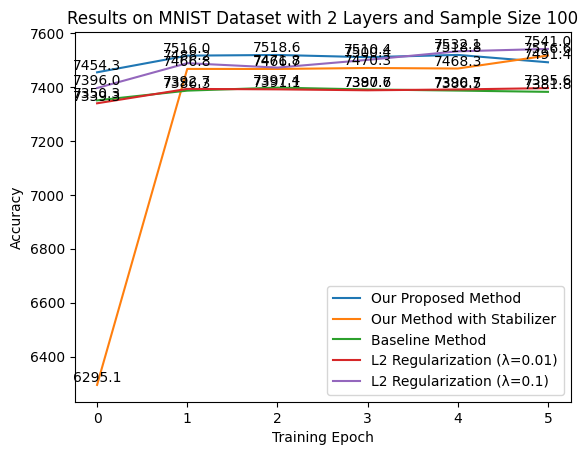

In [6]:

plot_with_values(model100.models, "MNIST", 2, 100)


In [13]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 6770.309653916211
1 6603.825136612021
2 6608.925318761384
3 6675.7741347905285
4 6946.265938069218


In [14]:
model500 = Classification(MAXNUM, inputn, 500, device)
model500.build_model(2, inputn, nnumber1, nnumber2 )


In [15]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 8201.900847675313
2 6726.725624747716
3 8221.349675241276
4 8278.9622399178
5 8290.337969248834
turn  1
1 8433.635462918792
2 8249.422039558181
3 8386.297750541265
4 8361.711496825805
5 8388.682984110676
turn  2
1 8503.908113463725
2 8398.590877398994
3 8386.664709551944
4 8394.003889765514
5 8491.431507100657
turn  3
1 8571.061612417892
2 8525.37521558842
3 8392.16909471212
4 8412.35184029944
5 8461.707827235698
turn  4
1 8558.218047044145
2 8542.989248100987
3 8393.453451249496
4 8386.664709551944
5 8483.541888371068
turn  5
1 8560.419801108217
2 8556.750211001432
3 8395.104766797549
4 8380.609885875747
5 8482.624490844373


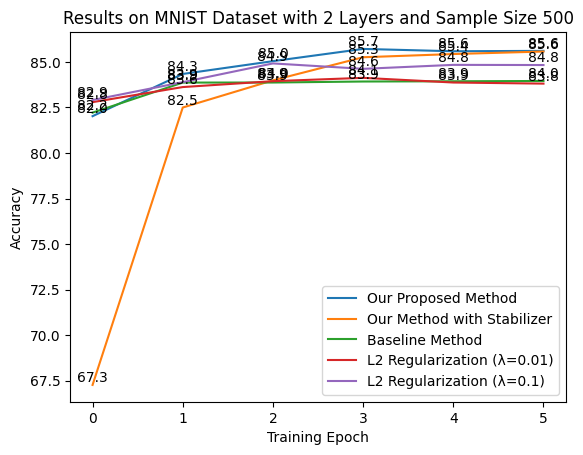

In [33]:

plot_with_values(model500.models, "MNIST", 2, 500)


In [17]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 8058.236394994679
1 8121.353344831382
2 7738.43161718836
3 7722.652379729185
4 8036.21885435397


In [4]:

model1000 = Classification(MAXNUM, inputn, 1000, device)
model1000.build_model(2, inputn, nnumber1, nnumber2 )


In [5]:

for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)

turn  0
1 8484.04058357402
2 7978.227060653188
3 8509.035029252758
4 8546.989557876028
5 8439.606013478488
turn  1
1 8666.777753091905
2 8543.842109160927
3 8669.369769680812
4 8708.06487447234
5 8686.588165592832
turn  2
1 8728.245575057395
2 8696.585943864327
3 8773.976153447382
4 8747.500555432127
5 8764.348663260016
turn  3
1 8768.977264311634
2 8754.536029030587
3 8783.788787676813
4 8792.30541361179
5 8799.34088721025
turn  4
1 8781.38191512997
2 8792.675701695918
3 8786.565948307783
4 8783.048211508554
5 8767.681256017182
turn  5
1 8802.48833592535
2 8812.486114196845
3 8791.749981485596
4 8798.044878915796
5 8834.518255202549


In [19]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 8262.423165222543
2 7288.195215877953
3 8347.404280530252
4 8387.765681700363
5 8279.826705176627
turn  1
1 8609.568244093905
2 8388.135969784493
3 8605.865363252611
4 8640.30215507665
5 8639.746722950455
turn  2
1 8682.700140709472
2 8609.938532178034
3 8739.169073539213
4 8732.133599940753
5 8738.24335332889
turn  3
1 8724.727838258164
2 8688.809894097607
3 8762.312078797304
4 8776.56817003629
5 8776.56817003629
turn  4
1 8733.985040361402
2 8723.246685921647
3 8772.124713026735
4 8774.531585573575
5 8753.425164778198
turn  5
1 8753.795452862327
2 8761.201214544915
3 8769.53269643783
4 8781.011627045842
5 8791.194549359401


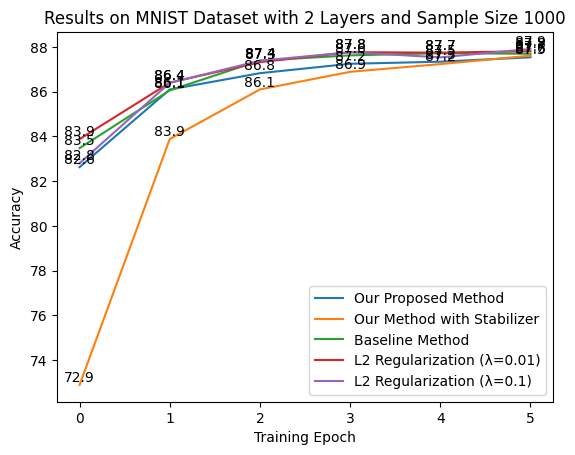

In [34]:

plot_with_values(model1000.models, "MNIST", 2, 1000)


In [21]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 8370.547285788343
1 8197.62275049989
2 7357.80937569429
3 7471.487817522032
4 8308.338887654594


In [22]:

inputn=28*28
nnumber1=64
nnumber2=32
nnumber3=10

model100 = Classification(MAXNUM, inputn, 100, device)
model100.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [23]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model100)


turn  0
1 7374.499089253188
2 7278.688524590165
3 7200.546448087432
4 7247.176684881603
5 7328.051001821494
turn  1
1 7436.247723132969
2 7487.7959927140255
3 7242.8051001821495
4 7316.393442622951
5 7406.0109289617485
turn  2
1 7456.284153005465
2 7460.473588342441
3 7275.591985428052
4 7341.712204007285
5 7459.927140255009
turn  3
1 7463.570127504554
2 7431.693989071039
3 7281.056466302368
4 7356.284153005465
5 7499.635701275046
turn  4
1 7482.695810564664
2 7362.659380692168
3 7289.981785063753
4 7364.845173041894
5 7545.719489981785
turn  5
1 7472.313296903461
2 7331.147540983607
3 7290.163934426229
4 7380.327868852459
5 7582.695810564664


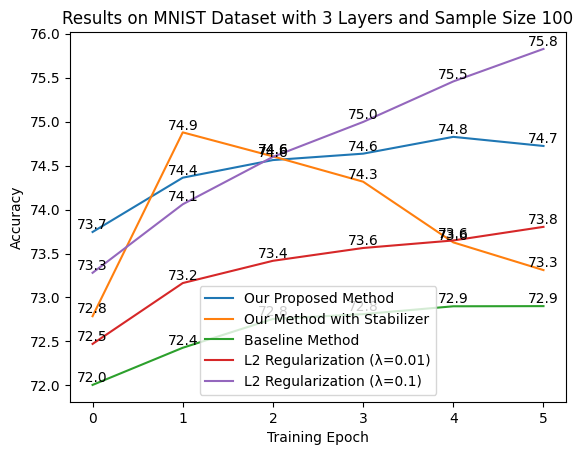

In [35]:

plot_with_values(model100.models, "MNIST", 3, 100)


In [36]:
for i in range(5):
    m = model100.models[i]
    print( i, model100.test_step_noise(m, X ,Y) )

0 6815.11839708561
1 6217.12204007286
2 6482.513661202186
3 6580.510018214937
4 6997.267759562842


In [37]:
model500 = Classification(MAXNUM, inputn, 500, device)
model500.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [38]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model500)


turn  0
1 8362.99585336318
2 8003.92646141426
3 8402.07698800044
4 8398.407397893656
5 8418.773622986311
turn  1
1 8515.4673223001
2 8517.30211735349
3 8491.064548089978
4 8481.523613812338
5 8454.368647022127
turn  2
1 8565.924186268394
2 8548.126674250485
3 8504.642031485084
4 8510.880334666617
5 8562.988514182965
turn  3
1 8587.207808887746
2 8568.309419837804
3 8514.916883784083
4 8516.201240321456
5 8535.466588382078
turn  4
1 8574.180764008659
2 8559.50240358152
3 8508.495101097207
4 8515.10036328942
5 8535.650067887416
turn  5
1 8568.125940332466
2 8585.189534329014
3 8508.495101097207
4 8506.109867527797
5 8538.952698983525


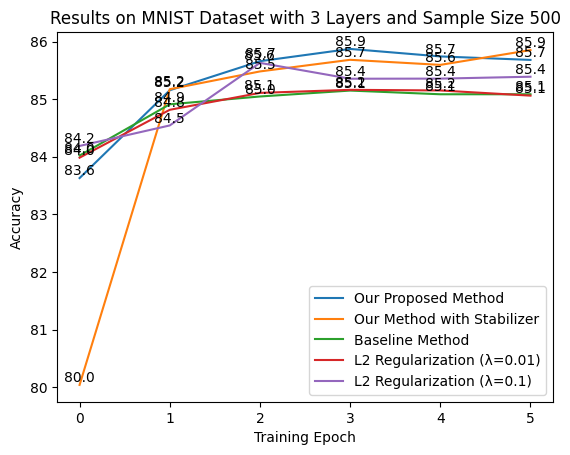

In [39]:

plot_with_values(model500.models, "MNIST", 3, 500)


In [40]:
for i in range(5):
    m = model500.models[i]
    print( i, model500.test_step_noise(m, X ,Y) )

0 7915.48933984074
1 7796.411140875564
2 7630.1787090382
3 7631.830024586254
4 8000.990789328833


In [41]:

model1000 = Classification(MAXNUM, inputn, 1000, device)
model1000.build_model(3, inputn, nnumber1, nnumber2, nnumber3 )


In [42]:
for i in range(6):
    print("turn ", i)
    trainmodelset(model1000)


turn  0
1 8564.76338591424
2 8335.55506183811
3 8631.230097015477
4 8659.001703325186
5 8567.725690587276
turn  1
1 8726.394134636746
2 8721.395245501
3 8712.323187439828
4 8803.043768051544
5 8763.978375175888
turn  2
1 8823.779900762795
2 8791.749981485596
3 8831.741094571576
4 8788.047100644302
5 8847.108050062949
turn  3
1 8830.25994223506
2 8860.623565133674
3 8816.55928312227
4 8856.365252166184
5 8840.998296674814
turn  4
1 8854.328667703474
2 8884.692290602088
3 8837.665703917648
4 8847.108050062949
5 8801.192327630897
turn  5
1 8860.253277049545
2 8903.206694808561
3 8837.480559875583
4 8848.77434644153
5 8865.807598311487


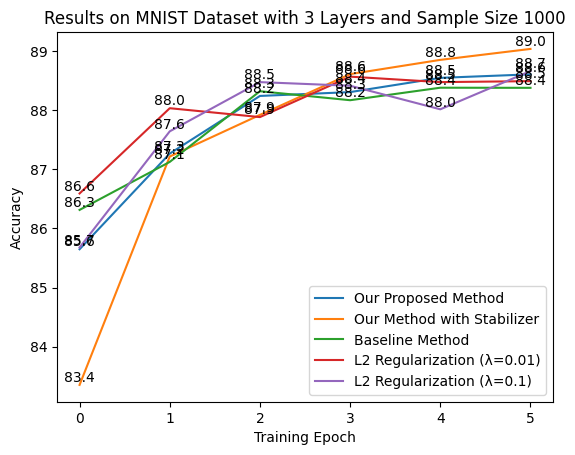

In [44]:

plot_with_values(model1000.models, "MNIST", 3, 1000)


In [45]:
for i in range(5):
    m = model1000.models[i]
    print( i, model1000.test_step_noise(m, X ,Y) )

0 8234.651558912834
1 8215.581722580167
2 7864.73376286751
3 7975.264755980153
4 8389.431978078945


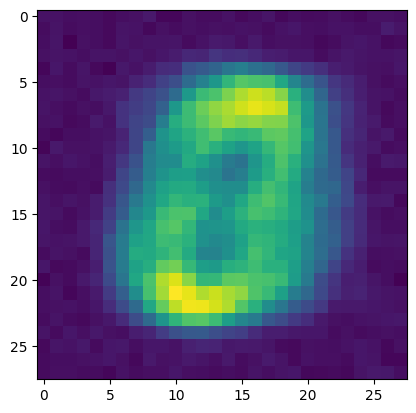

In [21]:
w1 = model1000.models[0].fc1_W1[6].reshape(28,28).detach().numpy()
plt.imshow(w1)

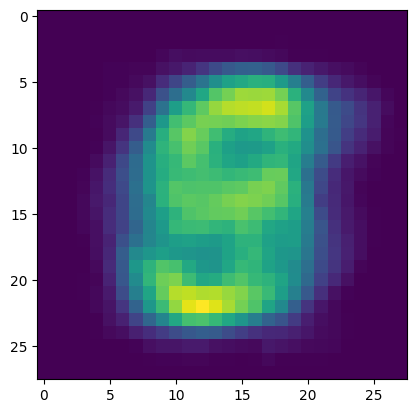

In [22]:
w2 = model1000.models[0].fc1_W2[6].reshape(28,28).detach().numpy()
plt.imshow(w2)

0


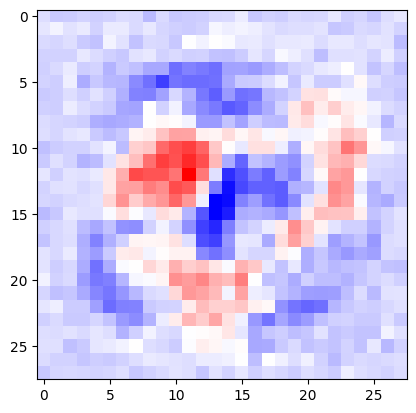

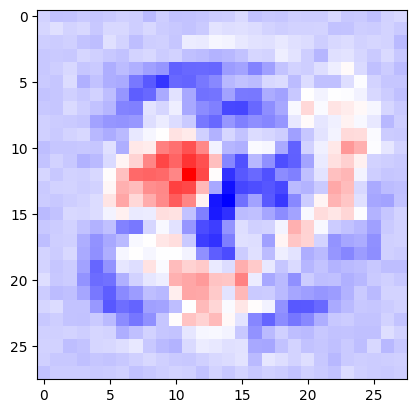

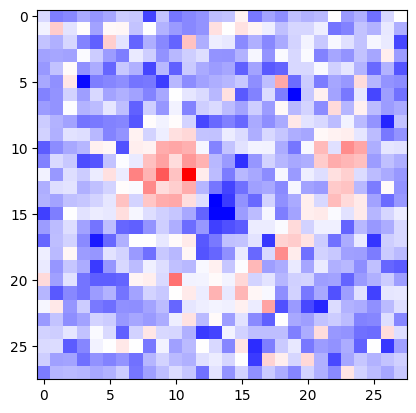

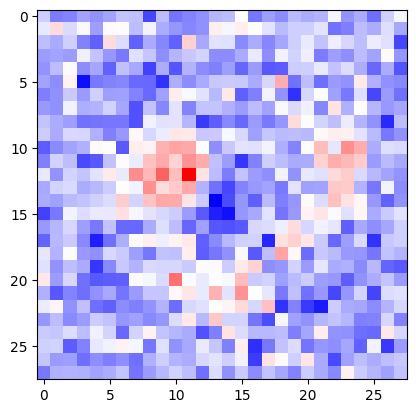

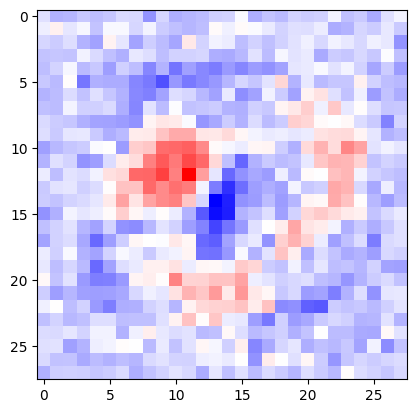

1


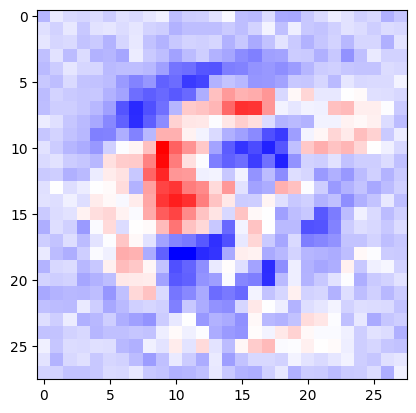

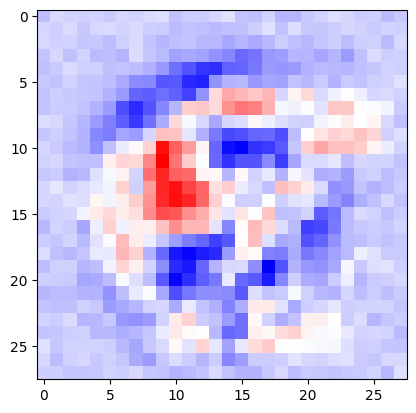

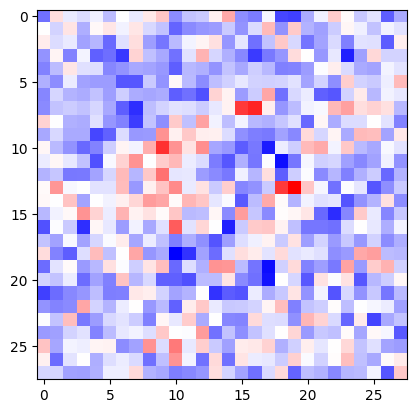

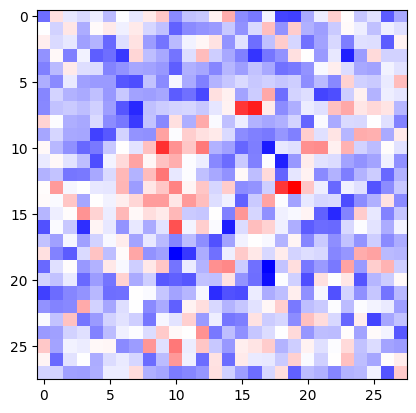

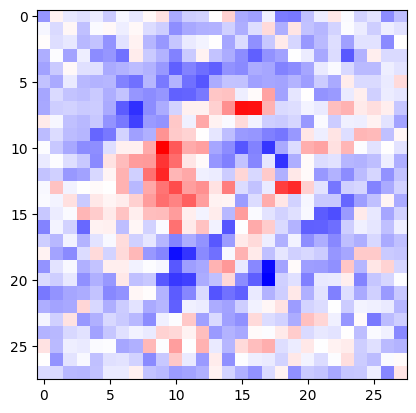

2


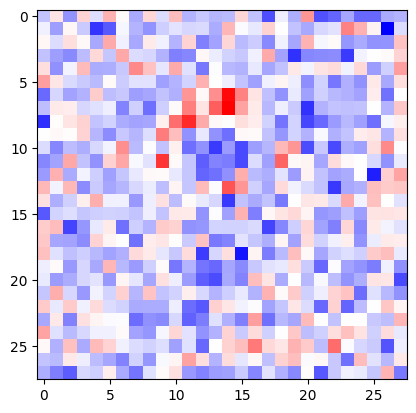

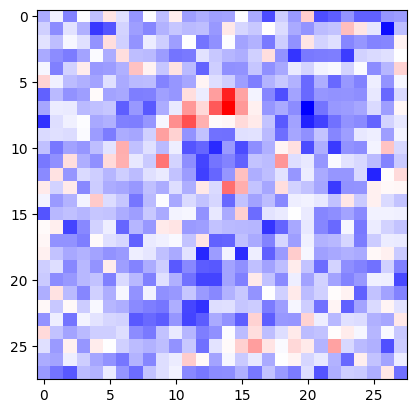

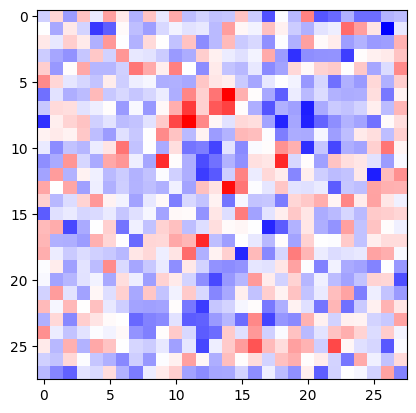

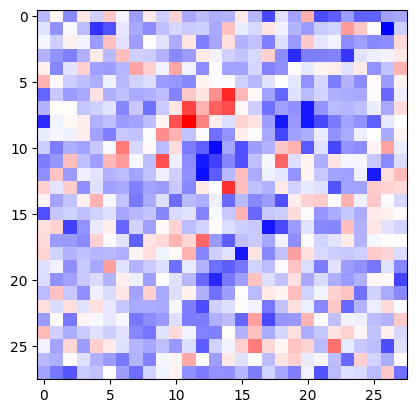

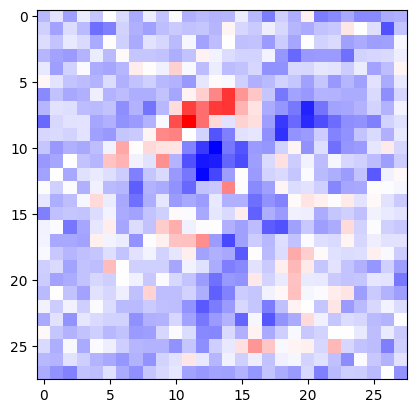

3


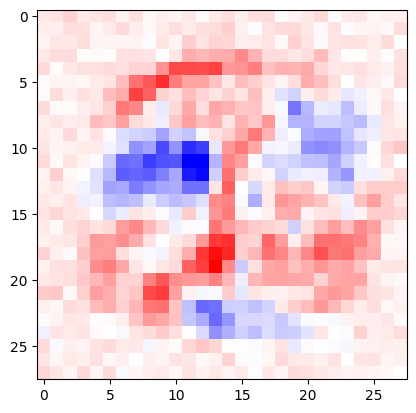

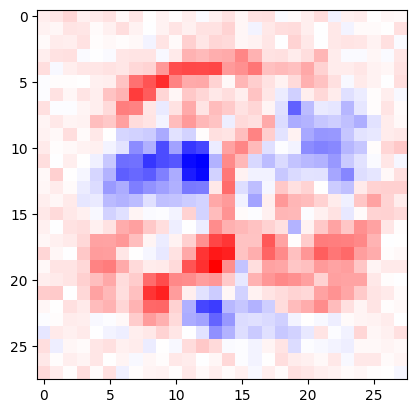

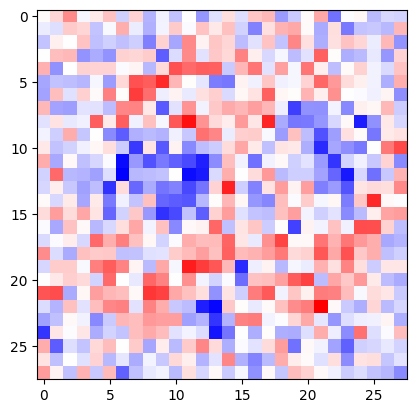

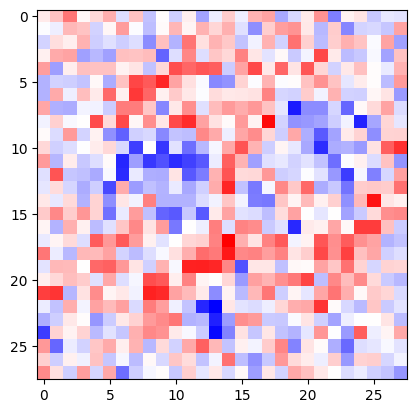

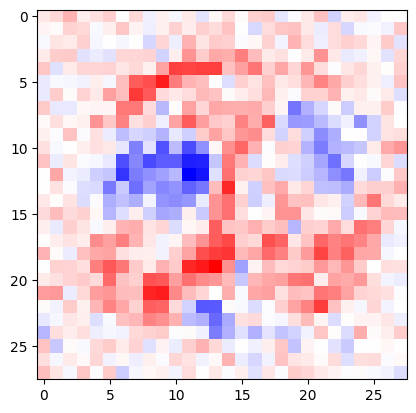

4


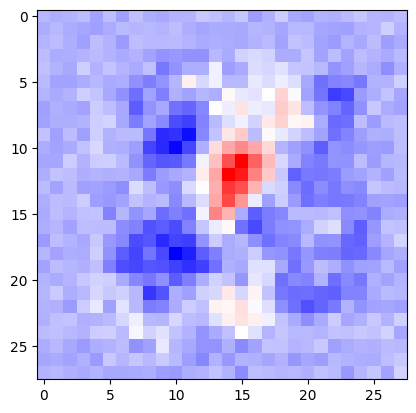

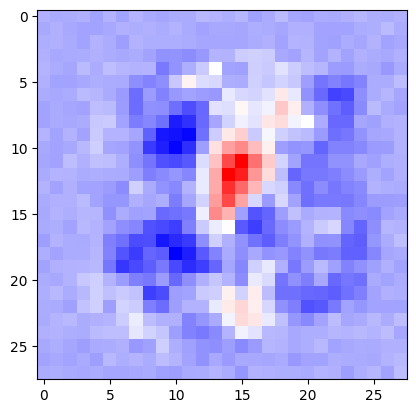

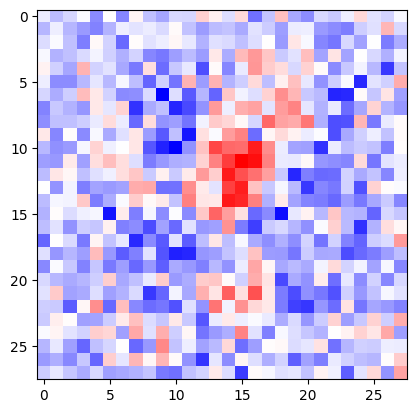

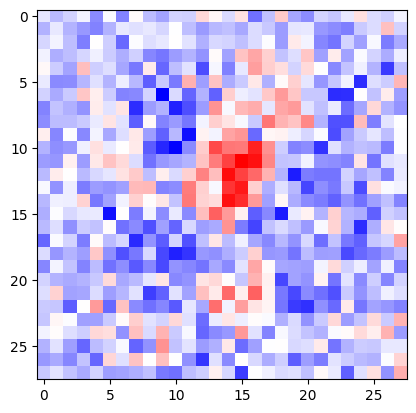

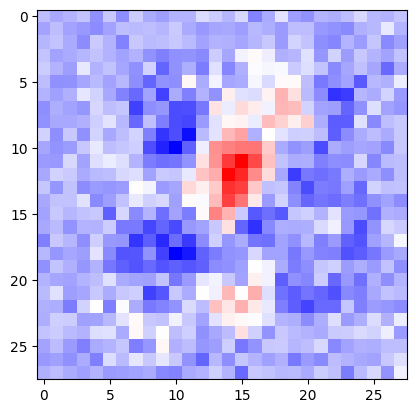

5


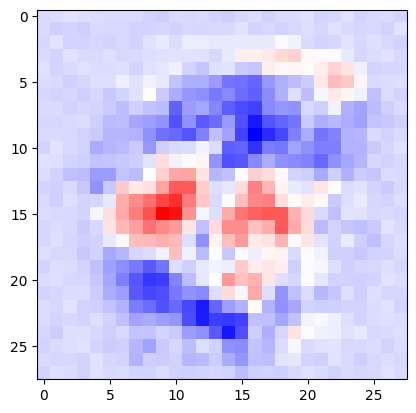

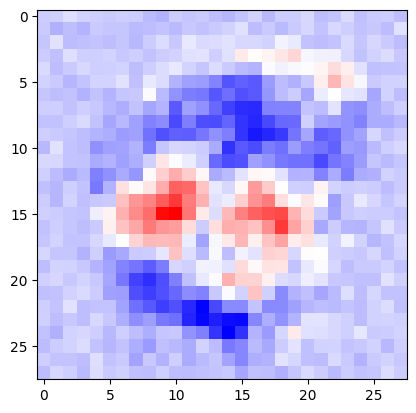

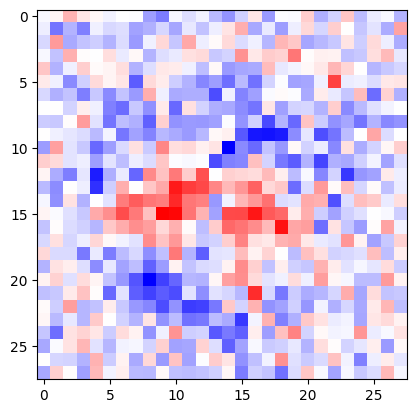

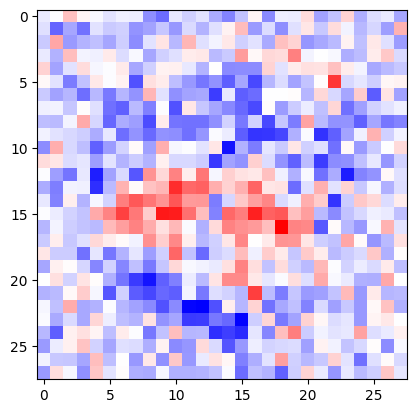

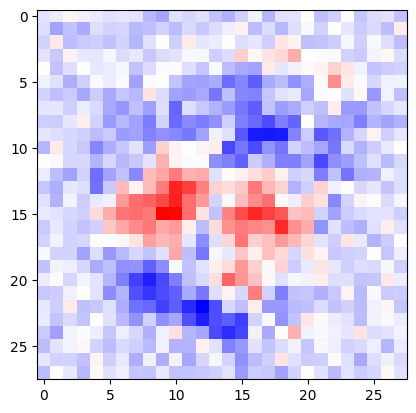

6


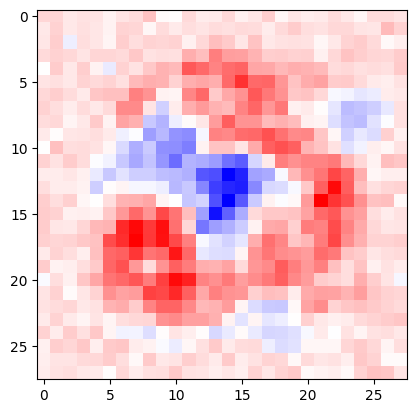

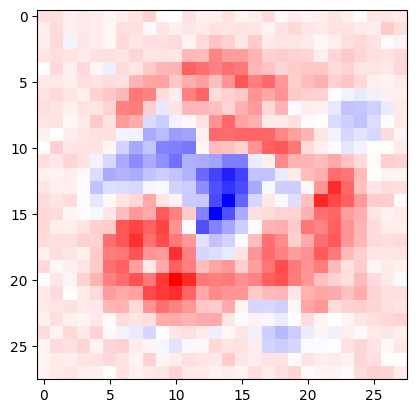

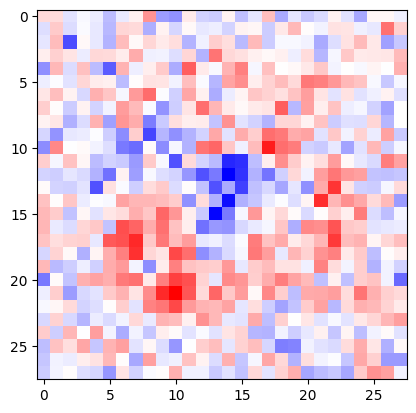

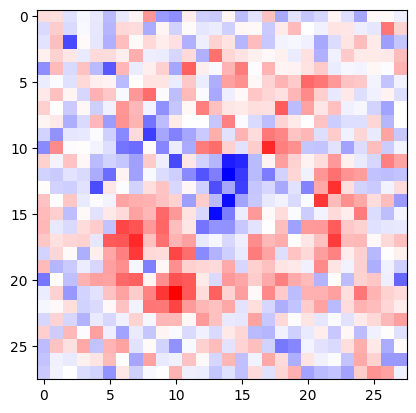

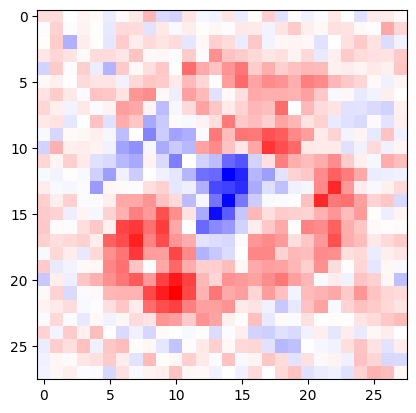

7


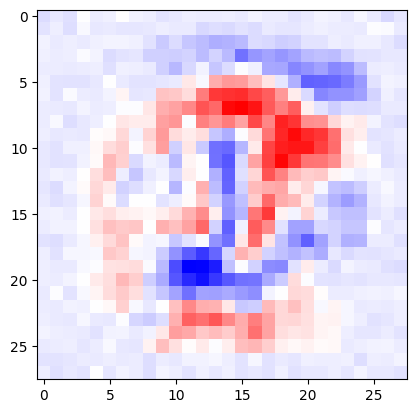

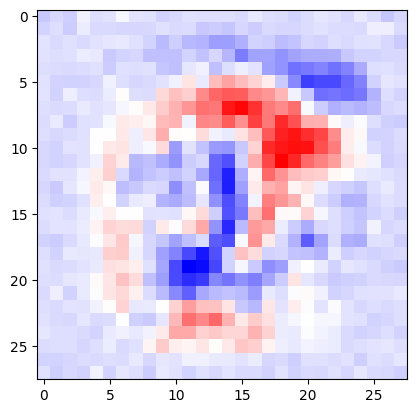

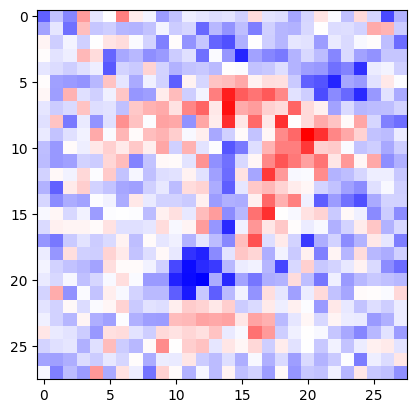

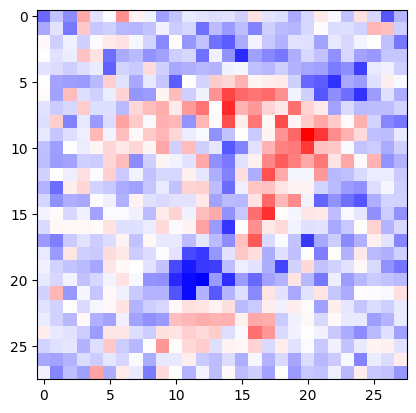

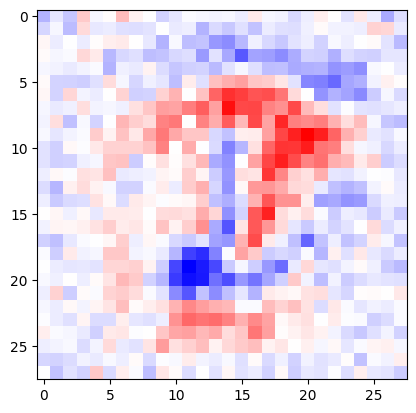

8


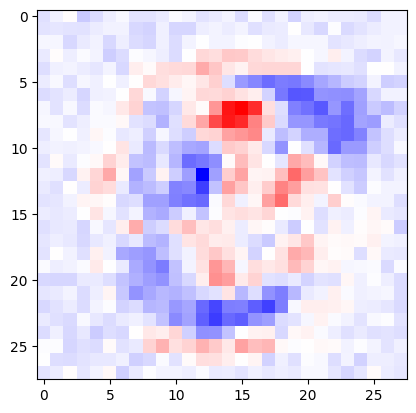

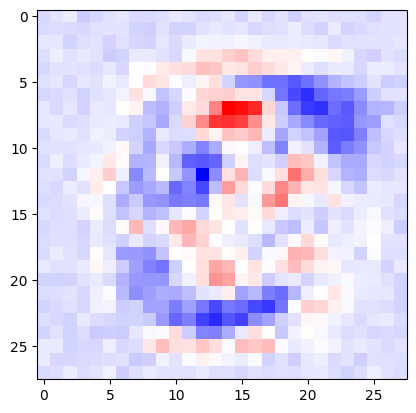

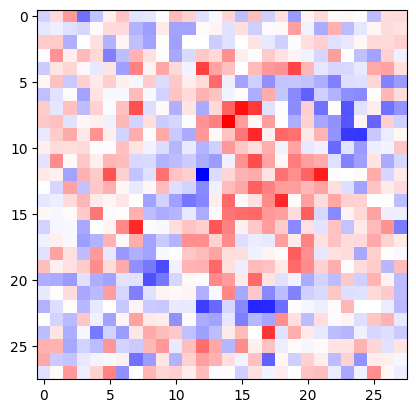

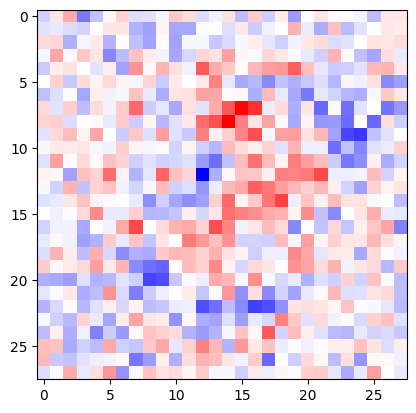

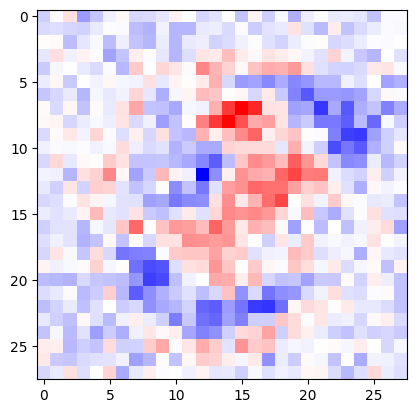

9


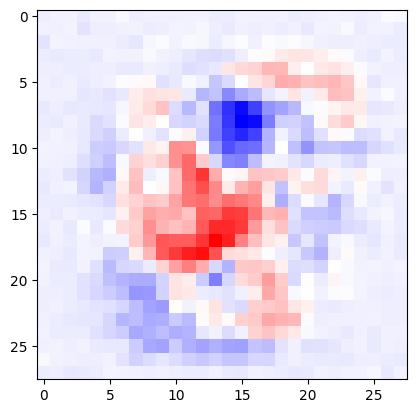

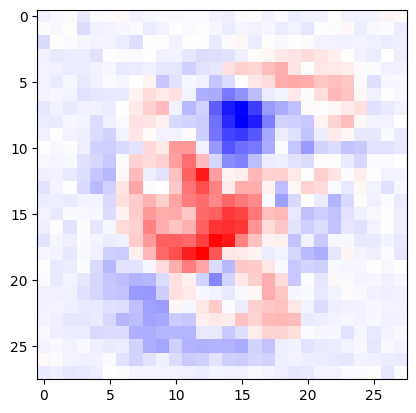

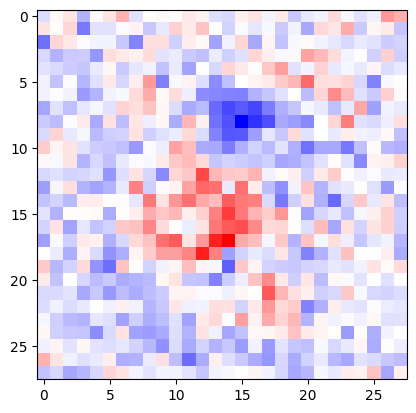

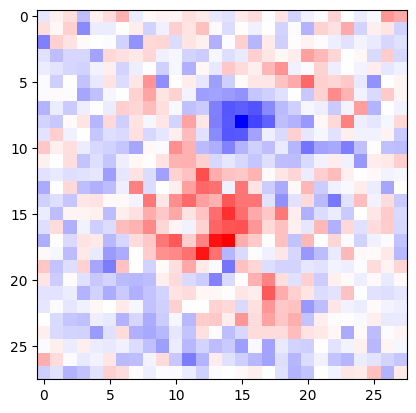

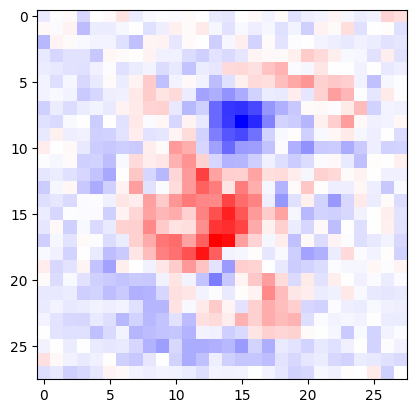

In [29]:

for numid in range(10):
    print(numid)
    w1 = model1000.models[0].fc1_W1[numid].reshape(28,28).detach().numpy()
    w2 = model1000.models[0].fc1_W2[numid].reshape(28,28).detach().numpy()
    plt.imshow(np.maximum(w1-w2,-1),cmap='bwr')
    plt.show()
    w1 = model1000.models[1].fc1_W1[numid].reshape(28,28).detach().numpy()
    w2 = model1000.models[1].fc1_W2[numid].reshape(28,28).detach().numpy()
    plt.imshow(np.maximum(w1-w2,-1),cmap='bwr')
    plt.show()
    for i in range(5)[2:5]:
        w = model1000.models[i].fc1_W[numid].reshape(28,28).detach().numpy()
        plt.imshow(w,cmap='bwr')
        plt.show()

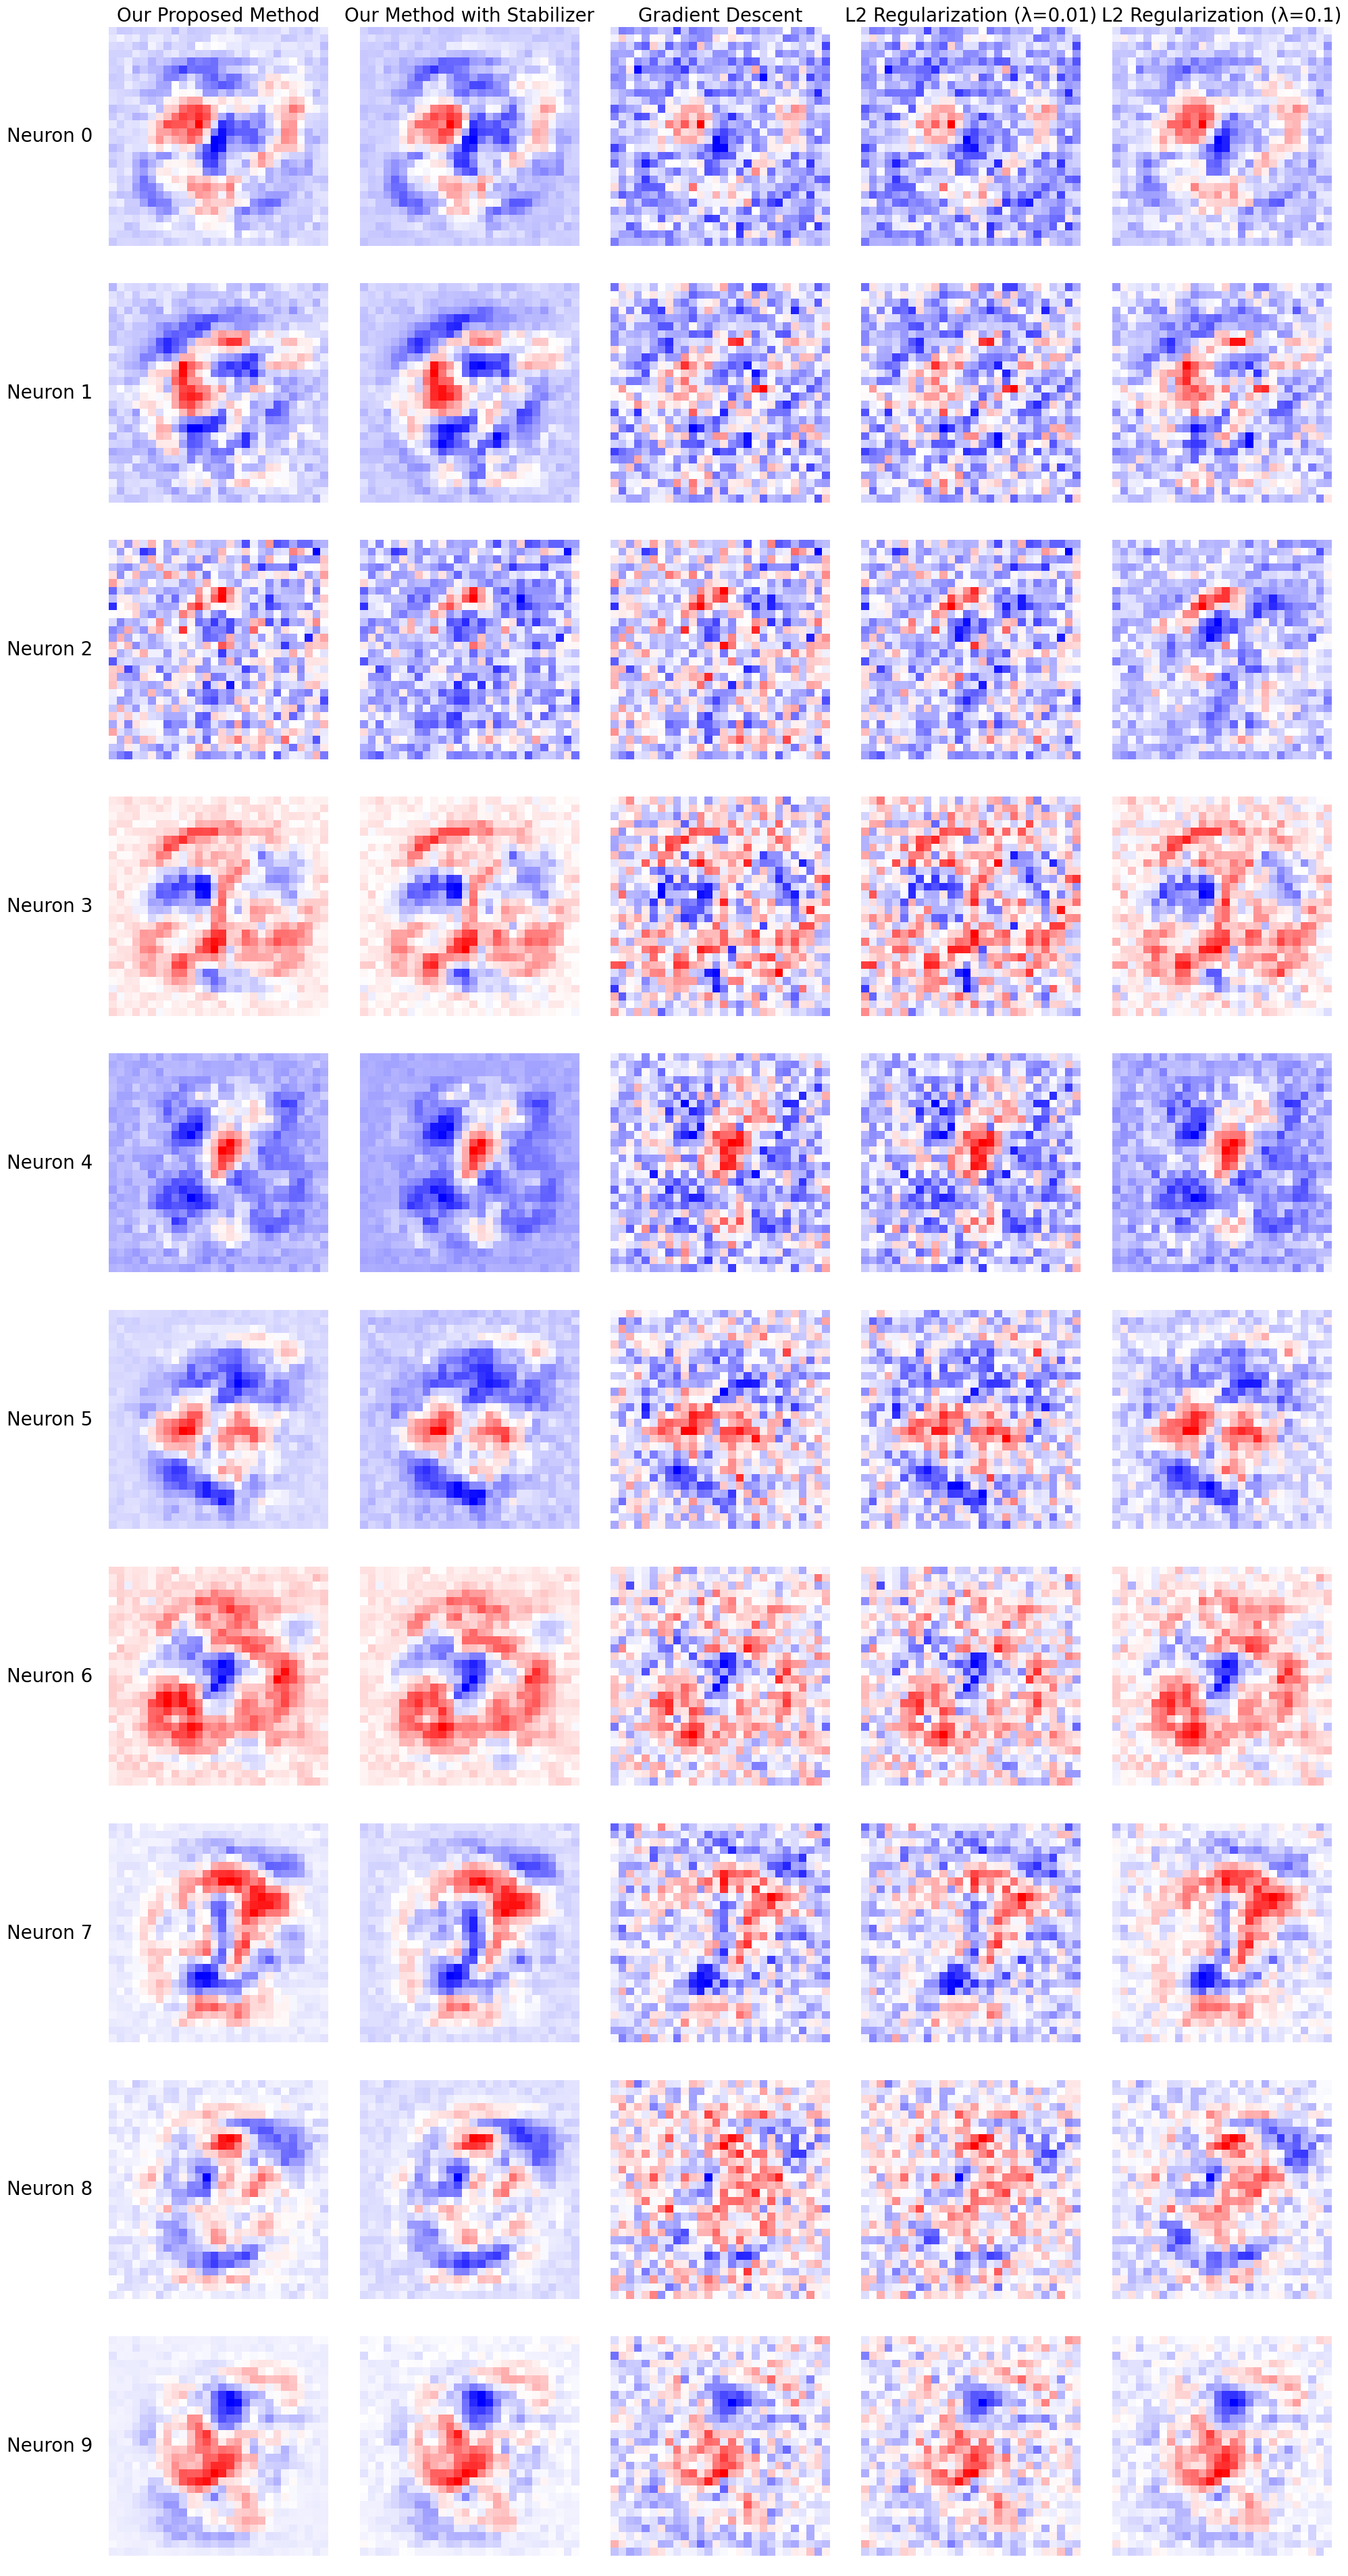

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Define model names for the columns
model_names = [
    'Our Proposed Method',
    'Our Method with Stabilizer',
    'Gradient Descent',
    'L2 Regularization (λ=0.01)',
    'L2 Regularization (λ=0.1)'
]

# Create a figure and define GridSpec for custom column widths
fig = plt.figure(figsize=(20, 40))
gs = GridSpec(10, 6, width_ratios=[1, 4, 4, 4, 4, 4])  # First column narrower

# Create axes for each subplot
axes = [[fig.add_subplot(gs[row, col]) for col in range(6)] for row in range(10)]

# Add model names as column headers
for col, model_name in enumerate(model_names):
    axes[0][col + 1].set_title(model_name, fontsize=20)  # Shift titles by one column

# Iterate over the neurons (rows)
for numid in range(10):
    # Add neuron number in the first column
    axes[numid][0].text(0.5, 0.5, f'Neuron {numid}', fontsize=20, ha='center', va='center')
    axes[numid][0].axis('off')  # Hide axis for the neuron number column

    # Plot data for the first two models
    for col in range(2):
        w1 = model1000.models[col].fc1_W1[numid].reshape(28, 28).detach().numpy()
        w2 = model1000.models[col].fc1_W2[numid].reshape(28, 28).detach().numpy()
        axes[numid][col + 1].imshow(np.maximum(w1 - w2, -1), cmap='bwr')
        axes[numid][col + 1].axis('off')

    # Plot data for the remaining three models
    for col, i in enumerate(range(5)[2:5], start=2):
        w = model1000.models[i].fc1_W[numid].reshape(28, 28).detach().numpy()
        axes[numid][col + 1].imshow(w, cmap='bwr')
        axes[numid][col + 1].axis('off')

# Add a main title to the figure
# fig.suptitle('Visualization of Neuron Receptive Fields Across Models', fontsize=20)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


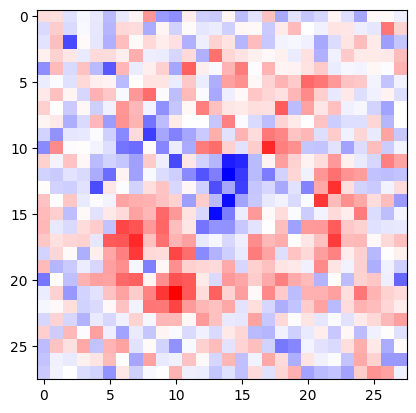

In [20]:
w = model1000.models[3].fc1_W[6].reshape(28,28).detach().numpy()
plt.imshow(w,cmap='bwr')

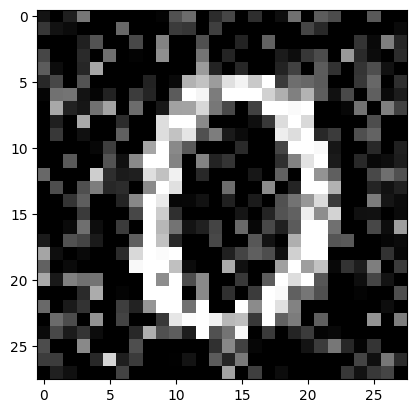

In [8]:
plt.imshow(np.clip((X[10] +np.random.randn(28,28,1)*0.3), 0, 1), cmap='gray')
# plt.imshow(X[10], cmap='gray')